In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split


TRAIN_DATA_PATH = 'NASA/MW1.csv'
TEST_DATA_PATH = 'NASA/MW1.csv'
TARGET_NAME = 'Defective'

train_data = pd.read_csv(TRAIN_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)

# x_train, y_train = train_data.drop(TARGET_NAME, axis=1), train_data[TARGET_NAME]
# x_test, y_test = test_data.drop(TARGET_NAME, axis=1), test_data[TARGET_NAME]


data = pd.read_csv(TRAIN_DATA_PATH)
y = data.Defective
X = data.drop('Defective', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

nameOfHeaders = x_train.columns.values

In [2]:
target = data['Defective']

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=101), scoring='accuracy')

In [3]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 23


array([0.83646724, 0.85213675, 0.85213675, 0.85569801, 0.85185185,
       0.87450142, 0.87094017, 0.86339031, 0.87849003, 0.87108262,
       0.87122507, 0.85968661, 0.86723647, 0.86723647, 0.87108262,
       0.85940171, 0.87108262, 0.87492877, 0.87863248, 0.87108262,
       0.87478632, 0.87478632, 0.88247863, 0.87492877, 0.87450142,
       0.87849003, 0.88219373, 0.87094017, 0.88219373, 0.87849003,
       0.87094017, 0.87478632, 0.87079772, 0.87094017, 0.86695157,
       0.88233618, 0.88219373])

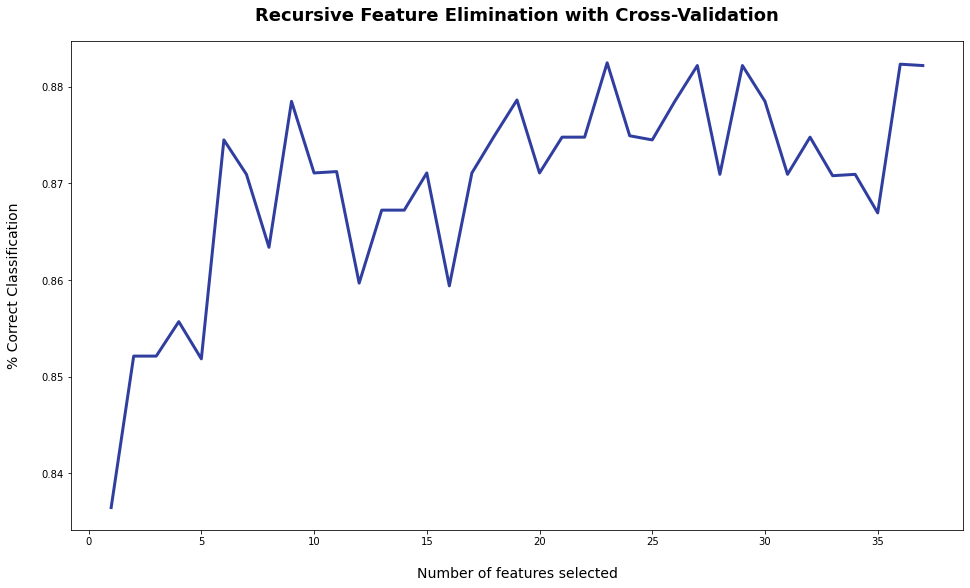

In [4]:
display(rfecv.grid_scores_)
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

[ 1  3  5  6  8  9 11 13 14 15 16 22 25 26]


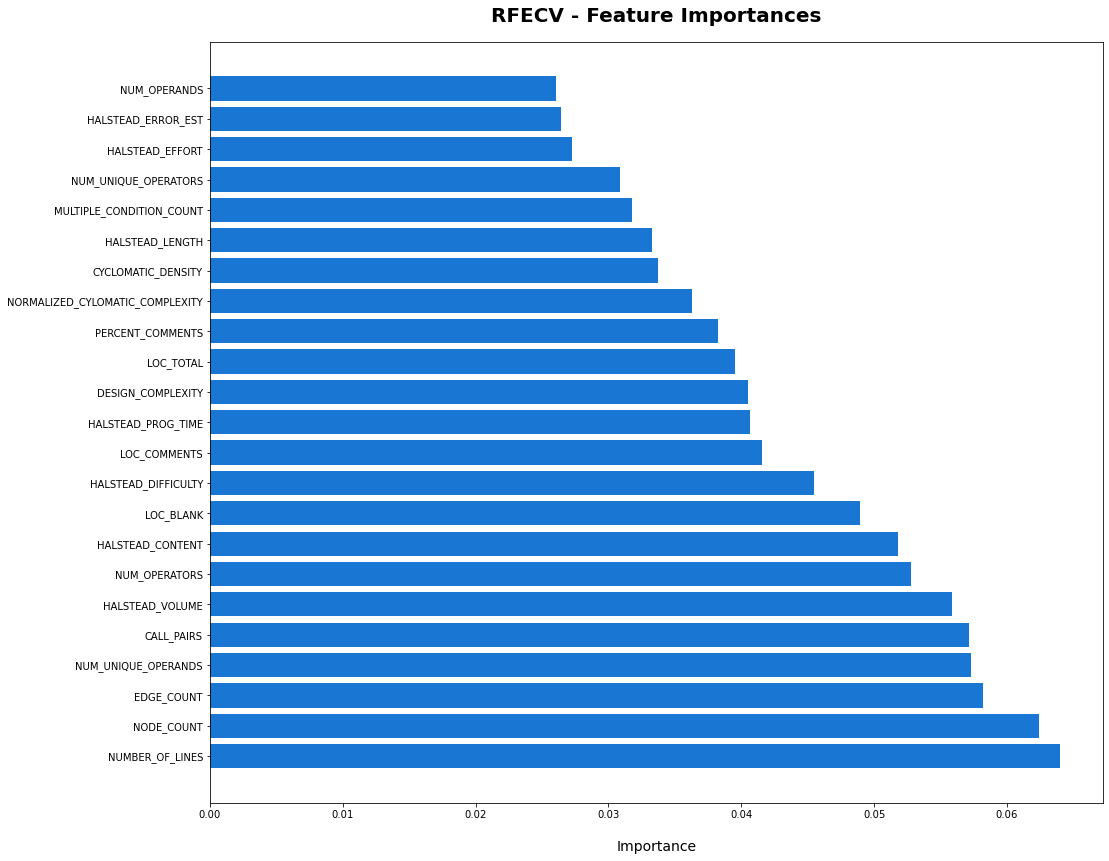

In [5]:
print(np.where(rfecv.support_ == False)[0])
X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()